In [2]:
# copied and adapted from "https://github.com/thu-vu92/the_witcher_network/blob/main/character_scraping.ipynb"
#!pip install selenium
#!pip install webdriver_manager

In [44]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import os
import logging

## Selenium Driver setup

In [45]:
## Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")

# Silent download of drivers
logging.getLogger('WDM').setLevel(logging.NOTSET)
os.environ['WDM_LOG'] = 'False'

# Create service
webdriver_service = Service(ChromeDriverManager().install())

# Create driver
driver = webdriver.Chrome(service = webdriver_service, options = chrome_options)

# Witcher code

# Malazan code

In [46]:
book_names = ["Gardens of the Moon","Deadhouse Gates","Memories of Ice","House of Chains","Midnight Tides","The Bonehunters","Reaper's Gale","Toll the Hounds","Dust of Dreams", "The Crippled God"]
books = []
for name in book_names:
    #book_url = category.get_attribute('href')
    #book_name = category.get_attribute("innerHTML")
    # sparse dramatis personae given in the books
    # books.append({'book_name': name, "url": "https://malazan.fandom.com/wiki/"+name.replace(" ","_")+"/Dramatis_Personae"})
    # full dramatis personae
    books.append({'book_name': name, "url": "https://malazan.fandom.com/wiki/"+name.replace(" ","_")+"/Dramatis_Personae#Complete_A-Z"})
books

[{'book_name': 'Gardens of the Moon',
  'url': 'https://malazan.fandom.com/wiki/Gardens_of_the_Moon/Dramatis_Personae#Complete_A-Z'},
 {'book_name': 'Deadhouse Gates',
  'url': 'https://malazan.fandom.com/wiki/Deadhouse_Gates/Dramatis_Personae#Complete_A-Z'},
 {'book_name': 'Memories of Ice',
  'url': 'https://malazan.fandom.com/wiki/Memories_of_Ice/Dramatis_Personae#Complete_A-Z'},
 {'book_name': 'House of Chains',
  'url': 'https://malazan.fandom.com/wiki/House_of_Chains/Dramatis_Personae#Complete_A-Z'},
 {'book_name': 'Midnight Tides',
  'url': 'https://malazan.fandom.com/wiki/Midnight_Tides/Dramatis_Personae#Complete_A-Z'},
 {'book_name': 'The Bonehunters',
  'url': 'https://malazan.fandom.com/wiki/The_Bonehunters/Dramatis_Personae#Complete_A-Z'},
 {'book_name': "Reaper's Gale",
  'url': "https://malazan.fandom.com/wiki/Reaper's_Gale/Dramatis_Personae#Complete_A-Z"},
 {'book_name': 'Toll the Hounds',
  'url': 'https://malazan.fandom.com/wiki/Toll_the_Hounds/Dramatis_Personae#Comple

## Scraping by book

In [47]:
character_list = []

for book in books:
    # go to book page
    driver.get(book['url'])
    print(book)
    
    #character_elems = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')
    #character_elems = driver.find_elements(by=By.XPATH, value="//div[@id ='wds-tab__content wds-is-current']/ul/a")
    character_elems = driver.find_elements(by=By.XPATH, value="//div[@class='wds-tab__content wds-is-current']//ul//a")
    
    for elem in character_elems:
        character_list.append({'book': book['book_name'],'character': elem.get_attribute("innerHTML")})

{'book_name': 'Gardens of the Moon', 'url': 'https://malazan.fandom.com/wiki/Gardens_of_the_Moon/Dramatis_Personae#Complete_A-Z'}
{'book_name': 'Deadhouse Gates', 'url': 'https://malazan.fandom.com/wiki/Deadhouse_Gates/Dramatis_Personae#Complete_A-Z'}
{'book_name': 'Memories of Ice', 'url': 'https://malazan.fandom.com/wiki/Memories_of_Ice/Dramatis_Personae#Complete_A-Z'}
{'book_name': 'House of Chains', 'url': 'https://malazan.fandom.com/wiki/House_of_Chains/Dramatis_Personae#Complete_A-Z'}
{'book_name': 'Midnight Tides', 'url': 'https://malazan.fandom.com/wiki/Midnight_Tides/Dramatis_Personae#Complete_A-Z'}
{'book_name': 'The Bonehunters', 'url': 'https://malazan.fandom.com/wiki/The_Bonehunters/Dramatis_Personae#Complete_A-Z'}
{'book_name': "Reaper's Gale", 'url': "https://malazan.fandom.com/wiki/Reaper's_Gale/Dramatis_Personae#Complete_A-Z"}
{'book_name': 'Toll the Hounds', 'url': 'https://malazan.fandom.com/wiki/Toll_the_Hounds/Dramatis_Personae#Complete_A-Z'}
{'book_name': 'Dust of

In [48]:
df = pd.DataFrame(character_list)
df.head(50)

book                                          character
0   Gardens of the Moon                                          A'Karonys
1   Gardens of the Moon                                                [1]
2   Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
3   Gardens of the Moon                                 Agent in Genabaris
4   Gardens of the Moon                                                [2]
5   Gardens of the Moon                                     Anomander Rake
6   Gardens of the Moon                                                [3]
7   Gardens of the Moon                                                [1]
8   Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
9   Gardens of the Moon                                              Antsy
10  Gardens of the Moon                                                [2]
11  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
12  Gardens of the Moon                                            Apsalar
13  Gardens of the Moon                                                [4]
14  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
15  Gardens of the Moon                                             Aragan
16  Gardens of the Moon                                                [3]
17  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
18  Gardens of the Moon                         Assassin High House Shadow
19  Gardens of the Moon                                                [2]
20  Gardens of the Moon                                              Baran
21  Gardens of the Moon                                                [5]
22  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
23  Gardens of the Moon                                              Baruk
24  Gardens of the Moon                                                [6]
25  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
26  Gardens of the Moon                                          Bellurdan
27  Gardens of the Moon                                                [1]
28  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
29  Gardens of the Moon                                            Berrute
30  Gardens of the Moon                                                [7]
31  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
32  Gardens of the Moon                        Black Moranth patrol leader
33  Gardens of the Moon                                                [8]
34  Gardens of the Moon                                              Blind
35  Gardens of the Moon                                                [5]
36  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
37  Gardens of the Moon                                              Blues
38  Gardens of the Moon                                                [9]
39  Gardens of the Moon                                             Boruld
40  Gardens of the Moon                                               [10]
41  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
42  Gardens of the Moon                                      Caladan Brood
43  Gardens of the Moon                                                [1]
44  Gardens of the Moon                                               [11]
45  Gardens of the Moon                                              Calot
46  Gardens of the Moon                                                [1]
47  Gardens of the Moon  <img alt="Spoiler safe" src="data:image/gif;ba...
48  Gardens of the Moon                                         Cannig Tol
49  Gardens of the Moon                                               [12]

In [53]:
# put all the characters (from links) in a dataframe
df = pd.DataFrame(character_list)

# remove the spoiler safety links
df = df[df["character"].str.contains("Spoiler") == False]
# remove reference links
df = df[df["character"].str.contains("\[") == False]
# remove non-character (link) names
df = df.drop(df[df.character=='Genabackis Campaign'].index)
df = df.drop(df[df.character=='Warren of Shadow'].index)

# overlay different name of same characters
# TODO

# reset the indices to 0 - length dataframe
df = df.reset_index(drop=True)

In [54]:
# save the character dataframe in a file
df.to_csv("malazan_characters.csv", index=False)

# Number of characters per book

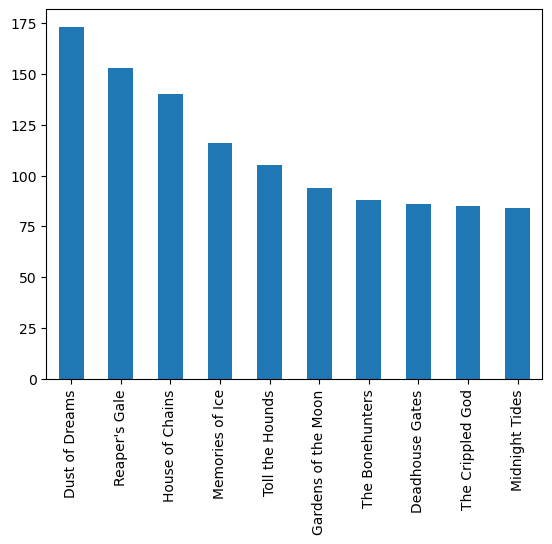

In [22]:
df['book'].value_counts().plot(kind="bar")
plt.show()

In [19]:
df[df["book"]=="Dust of Dreams"]

book       character
915   Dust of Dreams  Adjunct Tavore
916   Dust of Dreams       Quick Ben
917   Dust of Dreams           Keneb
918   Dust of Dreams         Blistig
919   Dust of Dreams     Lostara Yil
...              ...             ...
1083  Dust of Dreams            Mape
1084  Dust of Dreams            Rind
1085  Dust of Dreams            Pule
1086  Dust of Dreams            Bent
1087  Dust of Dreams           Roach

[173 rows x 2 columns]